<html>
    <div style='background: blue;">
    <h1>
        <a href="https://ischool.illinois.edu/">My first page!</a>
    </h1>
                ">Digital Humanities Tools and Project
    </div>
</html>


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df1 = pd.read_csv('meta_data7.csv')
df1.head()

,script_id,imdb_id,title,year,gross,lines_data
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...
1,1512,tt0147800,10 Things I Hate About You,1999,65.0,1777752320274533344457777722433777334443764677...
2,1514,tt0417385,12 and Holding,2005,NaN,5461357777754212454544441367774433446547647753...
3,1517,tt2024544,12 Years a Slave,2013,60.0,4567334777777777777777447777756477777444777777...
4,1520,tt1542344,127 Hours,2010,20.0,453513352345765766777777773340


In [9]:
df2 = pd.read_csv('character_list5.csv')
df2.head()

,script_id,imdb_character_name,words,gender,age
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0


In [10]:
df3 = pd.read_csv('character_mapping.csv')
df3.head()

,script_id,imdb_id,character_from_script,closest_character_name_from_imdb_match,closest_imdb_character_id
0,1,tt0147800,bianca,bianca stratford,nm0646351
1,1,tt0147800,cameron,cameron james,nm0330687
2,1,tt0147800,chastity,chastity,nm0005517
3,1,tt0147800,joey,joey donner,nm0005080
4,1,tt0147800,kat,kat stratford,nm0005466


In [37]:
df4 = pd.merge(df1, df2)
df4.head(3)

,script_id,imdb_id,title,year,gross,lines_data,imdb_character_name,words,gender,age
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,alison,316,f,27.0
1,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,autumn - girl a,402,f,29.0
2,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,co-worker 3,116,m,NaN


In [40]:
df_after = df4[df4['year']>=2000]
#12632 rows

In [42]:
df_before = df4[df4['year']<2000]
#10416 rows

In [43]:
df_before['words'].sum()/10416
#prior to 2000, roughly 940 words per character

940.4371159754224

In [44]:
df_after['words'].sum()/12632
#after 2000, roughly 881 words per character 

881.0187618746041

In [58]:
result = pd.merge(df1, df2, on="script_id")
result.head(4)

,script_id,imdb_id,title,year,gross,lines_data,imdb_character_name,words,gender,age
0,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,alison,316,f,27.0
1,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,autumn - girl a,402,f,29.0
2,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,co-worker 3,116,m,NaN
3,1534,tt1022603,(500) Days of Summer,2009,37.0,7435445256774774443342577775657744434444564456...,douche,134,m,32.0


In [67]:
df5 = result['gross']
df5.head

<bound method NDFrame.head of 0        37.0
1        37.0
2        37.0
3        37.0
4        37.0
         ... 
23043    41.0
23044    41.0
23045    41.0
23046    41.0
23047    41.0
Name: gross, Length: 23048, dtype: float64>

In [69]:
df6 = result['words']
df6.head

<bound method NDFrame.head of 0        316
1        402
2        116
3        134
4        192
        ... 
23043    395
23044    311
23045    307
23046    145
23047    306
Name: words, Length: 23048, dtype: int64>

In [74]:
result1 = pd.merge(df5, df6, left_index=True, right_index=True)
result1.head()

,gross,words
0,37.0,316
1,37.0,402
2,37.0,116
3,37.0,134
4,37.0,192


<function matplotlib.pyplot.show(*args, **kw)>

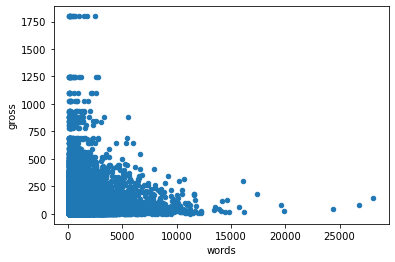

In [89]:
result1.plot.scatter(x="words", y="gross")
plt.show
#the issue here is that it doesn't take the sum of the words from each character